In [1]:
# Standard imports
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# For plotting inline
%matplotlib inline
plt.ion()

In [2]:
# Set default plotting parameters
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rc('text', usetex=True)
fontsize=9
mpl.rcParams['font.size'] = fontsize
mpl.rcParams['hatch.linewidth'] = 1
mpl.rcParams['hatch.color'] = 'black'

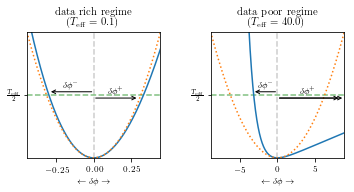

In [3]:
f = lambda dphi: np.exp(-dphi)-1+dphi
flap = lambda dphi: 0.5*dphi**2

betas = [.05,20]
titles = ['data rich regime', 'data poor regime']

figsize=[5,2.75]
fig, axs = plt.subplots(1,2,figsize=figsize)

for n, beta in enumerate(betas):
    ax = axs[n]
    xlim = [-np.sqrt(4*beta),np.sqrt(4*beta)]
    ylim = [0,2*beta]
    dphis = np.linspace(xlim[0],xlim[1],1000)

    ax.axvline(0,linestyle='--',color='k', alpha=.2)
    ax.axhline(beta, linestyle='--', color='g', alpha=.5)
    ax.plot(dphis,f(dphis))
    ax.plot(dphis,flap(dphis),':')
    
    if n==0:
        arrow_y = beta+.0025
        arrow_xmin = -.3
        arrow_xmax = 0
        arrow_xmid = arrow_xmin/2
        ax.annotate('',
                    xy=(arrow_xmin, arrow_y), 
                    xytext=(arrow_xmax, arrow_y),
                    arrowprops={'arrowstyle':'->'})
        ax.text(arrow_xmid, arrow_y+.0025, '$\delta \phi^-$', horizontalalignment='center', verticalalignment='bottom')
        
        arrow_y = beta-.0025
        arrow_xmin = 0
        arrow_xmax = .3
        arrow_xmid = arrow_xmax/2
        ax.annotate('',
                    xy=(arrow_xmin, arrow_y), 
                    xytext=(arrow_xmax, arrow_y),
                    arrowprops={'arrowstyle':'<-'})
        ax.text(arrow_xmid, arrow_y+.0025, '$\delta \phi^+$', horizontalalignment='center', verticalalignment='bottom')
        
        
        #ax.plot(0, arrow_y, 'ok')
        
    elif n==1:
        arrow_y = beta+1
        arrow_xmin = -3.3
        arrow_xmax = 0
        arrow_xmid = -1.5
        ax.annotate('',
                    xy=(arrow_xmin, arrow_y), 
                    xytext=(arrow_xmax, arrow_y),
                    arrowprops={'arrowstyle':'->'})
        ax.text(arrow_xmid, arrow_y+1, '$\delta \phi^-$', horizontalalignment='center', verticalalignment='bottom')
        
        arrow_y = beta-1
        arrow_xmin = 0
        arrow_xmax = xlim[1]
        arrow_xmid = 4
        ax.annotate('',
                    xy=(arrow_xmin, arrow_y), 
                    xytext=(arrow_xmax, arrow_y),
                    arrowprops={'arrowstyle':'<-'})
        ax.annotate('',
                    xy=(arrow_xmin, arrow_y), 
                    xytext=(arrow_xmax-.5, arrow_y),
                    arrowprops={'arrowstyle':'<-'})
        ax.text(arrow_xmid, arrow_y+1, '$\delta \phi^+$', horizontalalignment='center', verticalalignment='bottom')
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_title(titles[n] + '\n($T_\\mathrm{eff} = %0.1f$)'%(2*beta))
    ax.set_yticks([beta])
    ax.set_yticklabels(['$\\frac{T_{\mathrm{eff}}}{2}$'])
    ax.set_xlabel('$ \\leftarrow \\delta \\phi \\rightarrow$')
    
plt.tight_layout(w_pad=3)
fig.savefig('figures/fig_S1.pdf')
